# PSR B1919+21 Plot in Altair

*Data: Borgar Þorsteinsson, Michael Zöllner*

Adapted from d3 version at https://observablehq.com/@mbostock/psr-b1919-21, and [Vega-Lite version by Jeff Heer](https://observablehq.com/@vega/psr-b1919-21-with-vega-lite).

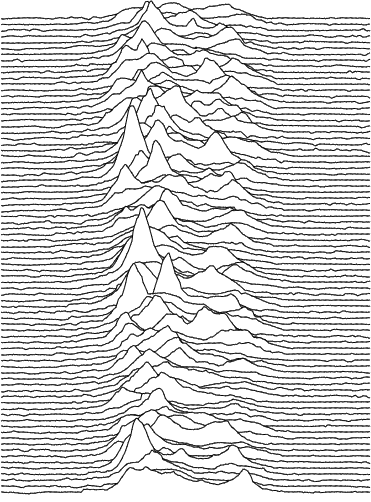

In [1]:
import numpy as np
import pandas as pd
import altair as alt
# alt.renderers.enable('notebook')

# Note: data is in a CSV with no header info. We first load it as a 2D array,
# and then create a one-column dataframe where each entry is a list.
# This leads to a compact data representation, from which we use Altair
# transforms to tidy the data within the chart specification.
url = 'https://gist.githubusercontent.com/borgar/31c1e476b8e92a11d7e9/raw/0fae97dab6830ecee185a63c1cee0008f6778ff6/pulsar.csv'
values = np.genfromtxt(url, delimiter=',')
df = pd.Series(values.tolist(), name='data').to_frame()

# These values tweak the spacing & overlap between lines.
step=6
overlap=12

alt.Chart(df).transform_window(
    series='row_number()'
).transform_flatten(
    ['data']
).transform_window(
    index='row_number()',
    groupby=['series']
).mark_line(
    fill='white',
    stroke='black',
    strokeWidth=1
).encode(
    x=alt.X('index:Q', axis=None),
    y=alt.Y('data:Q', scale=alt.Scale(range=[step, -overlap * (step + 1)]), axis=None),
    row=alt.Row('series:O', header=alt.Header(title=None, labelPadding=0, labelFontSize=0)),
    tooltip=None
).properties(
    width=370,
    height=step,
    bounds='flush',
    spacing=0,
    padding=0,
).configure_view(
    stroke=None,
    fill='white'
)

Compare to the more famous version:

<img src="https://www.thevintagenews.com/wp-content/uploads/2017/04/8700547602_0ec5b7f096_b-421x640.jpg">
